# Folk Songs

In [199]:
import pandas as pd
import music21 as m21
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc_context(rc=None, fname="../matplotlibrc")

import seaborn as sns
sns.set_context("notebook")

## Melodies

In [57]:
# parse all
corpora = m21.corpus.getComposer('essenFolksong')

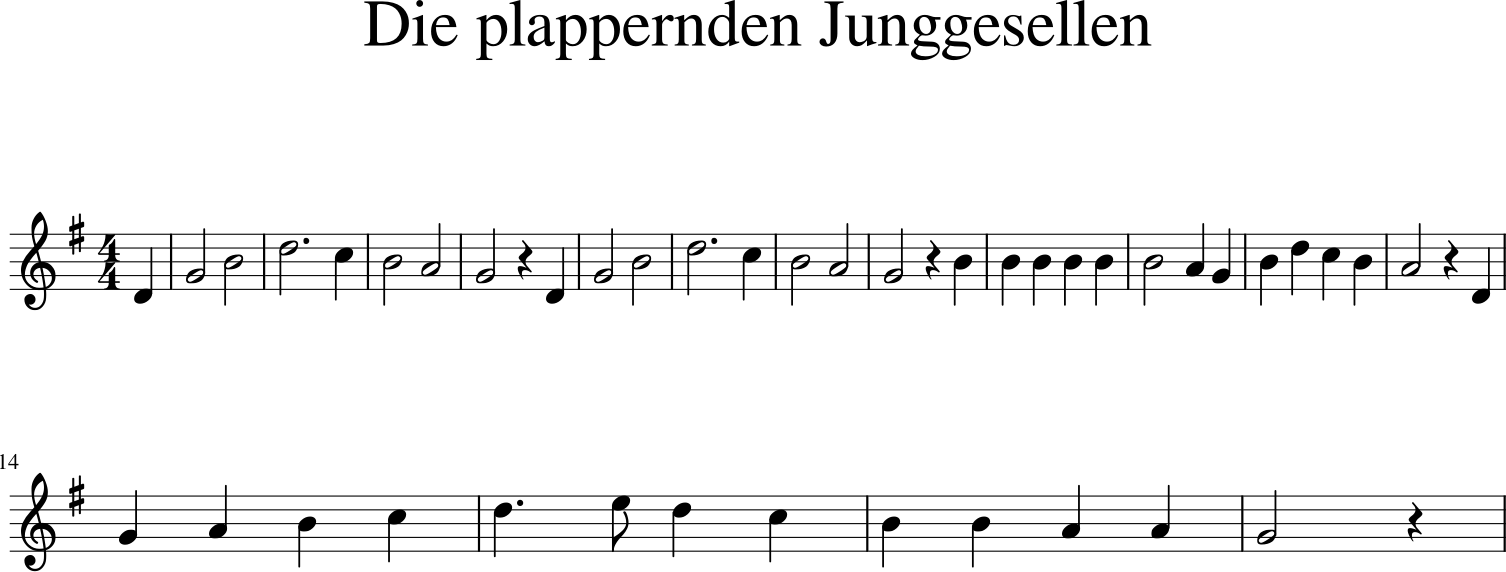

In [58]:
german_song = m21.converter.parse(corpora[0])[70]
german_song.show(fmt="musicxml.png", fp="./img/german_song.png")
german_song.show()

In [ ]:
german_song.show("Midi")

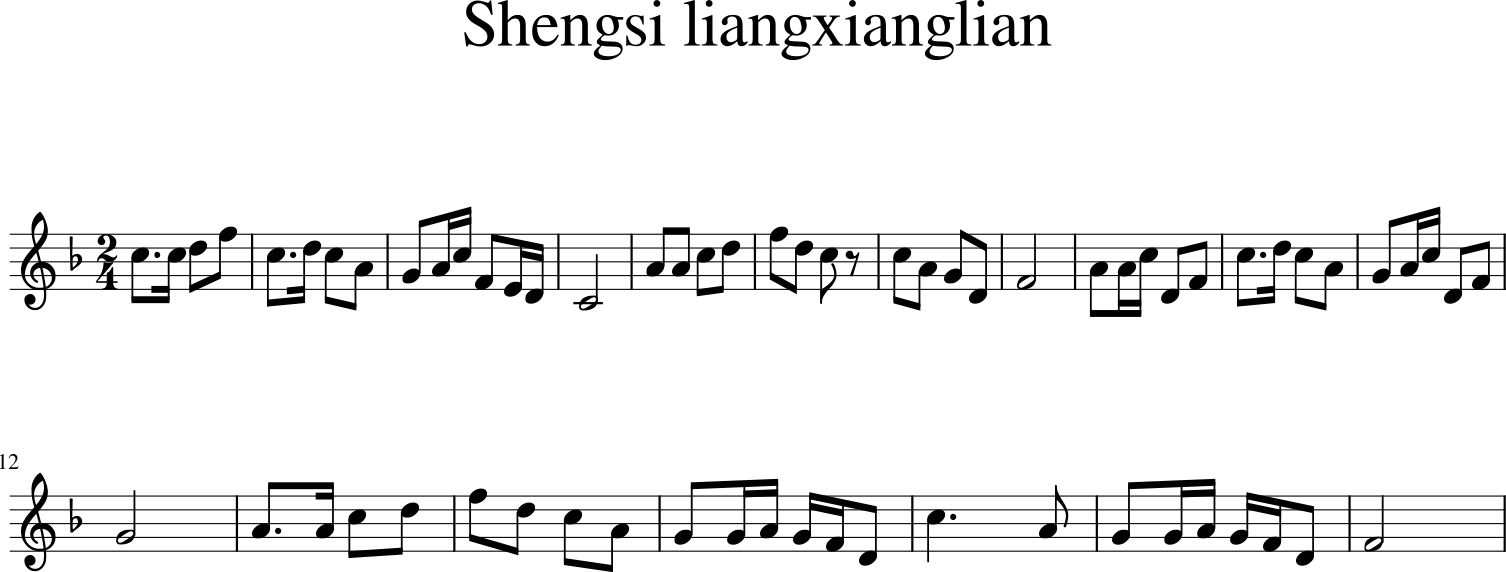

In [9]:
chinese_song = songs[6200]
chinese_song.show(fmt="musicxml.png", fp="./img/chinese_song.png")
chinese_song.show()

In [ ]:
chinese_song.show("Midi")

In [6]:
%%time 

# takes about 2 mins

songs = [s for i in range(len(corpora)) for s in m21.converter.parse(corpora[i]) ]

Wall time: 1min 5s


In [7]:
len(songs)

8514

In [8]:
print(f"We have {len(songs)} in the whole corpus.")

We have 8514 in the whole corpus.


In [59]:
def note_list(piece):
    l = np.array([ (note.pitch.midi, note.quarterLength) for note in piece.flat.notes ])
    return l

note_list(german_song)[:15]

array([[62.,  1.],
       [67.,  2.],
       [71.,  2.],
       [74.,  3.],
       [72.,  1.],
       [71.,  2.],
       [69.,  2.],
       [67.,  2.],
       [62.,  1.],
       [67.,  2.],
       [71.,  2.],
       [74.,  3.],
       [72.,  1.],
       [71.,  2.],
       [69.,  2.]])

In [60]:
def get_intervals(notelist):
    
    ints = np.array([ note2 - note1 for note1, note2 in zip(notelist, notelist[1:]) ])
    
    return ints

In [61]:
get_intervals(note_list(german_song))[:15]

array([[ 5.,  1.],
       [ 4.,  0.],
       [ 3.,  1.],
       [-2., -2.],
       [-1.,  1.],
       [-2.,  0.],
       [-2.,  0.],
       [-5., -1.],
       [ 5.,  1.],
       [ 4.,  0.],
       [ 3.,  1.],
       [-2., -2.],
       [-1.,  1.],
       [-2.,  0.],
       [-2.,  0.]])

In [215]:
def plot_melodic_profile(piece, ax=None, c=None, mean=False, Z=False):
    
    if ax == None:
        ax = plt.gca()
    
    notelist = note_list(piece) 
    
    n_notes = len(notelist)
    
    notes = pd.DataFrame(notelist, columns=["Pitch", "Duration"])
    notes["Onset"] = notes["Duration"].cumsum()
    
    x = notes["Onset"] / 4
    y = notes["Pitch"]
    
    if Z:
        x = x / x.max()
        y = (y - y.mean()) / y.std()

    ax.step(x,y, c=c)
    
    ax.set_xlabel("Onset")
    ax.set_ylabel("MIDI Pitch")
    ax.set_title(f"Melodic Profile: {piece.metadata.title}")
    
    if mean:
        ax.axhline(y.mean(), c="gray", ls="--")

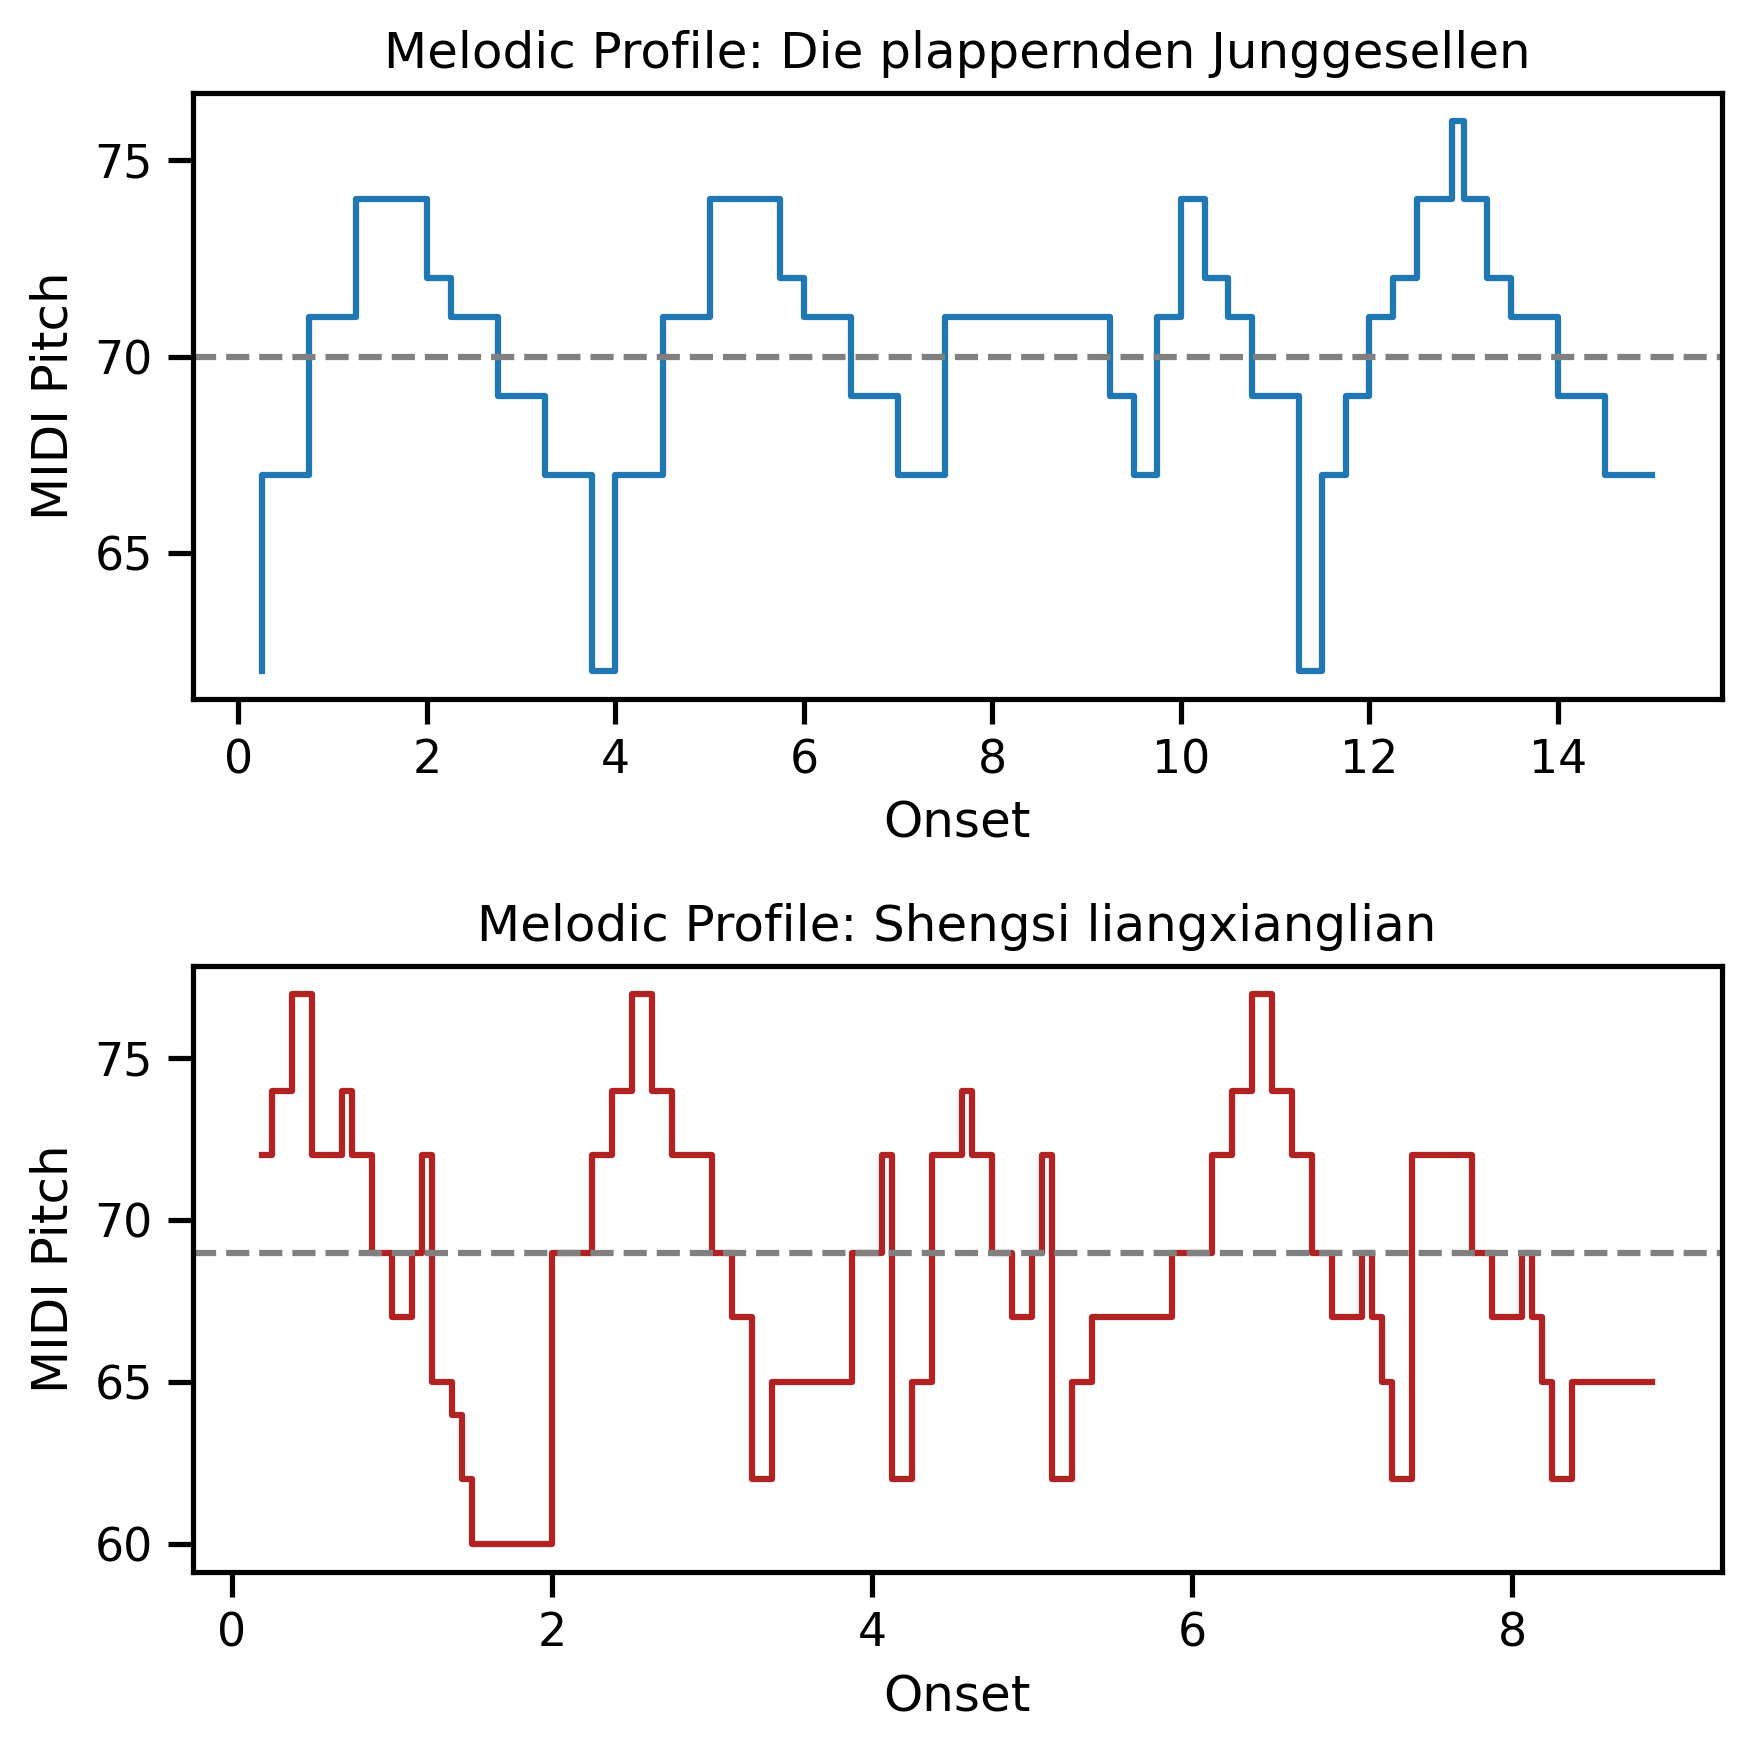

In [216]:
fig, axes = plt.subplots(2,1, figsize=(6,6))

plot_melodic_profile(german_song, ax=axes[0], mean=True)
plot_melodic_profile(chinese_song, ax=axes[1], c="firebrick", mean=True)

plt.tight_layout()
plt.savefig("img/melodic_profiles.png")

In [231]:
def plot_standardized(piece, c=None, ax=None, mean=True):
    
    if ax == None:
        ax = plt.gca()
    
    notelist = note_list(piece) 
    
    n_notes = len(notelist)
    
    notes = pd.DataFrame(notelist, columns=["Pitch", "Duration"])
    notes["Onset"] = notes["Duration"].cumsum()
    
    x = notes["Onset"] / 4
    y = notes["Pitch"]
    
    x = x / x.max()
    y = (y - y.mean()) / y.std()
    
    ax.set_xlabel("Standardized onset")
    ax.set_ylabel("Standardized MIDI Pitch")
    ax.set_title("Standardized Melodic Profile")
    ax.step(x,y, c=c)
    
    if mean:
        ax.axhline(0, c="gray", linestyle="--", linewidth=1)
        
    ax.axvline(.25, c="gray", linestyle="--", linewidth=1)
    ax.axvline(.5, c="gray", linestyle="--", linewidth=1)
    ax.axvline(.75, c="gray", linestyle="--", linewidth=1)

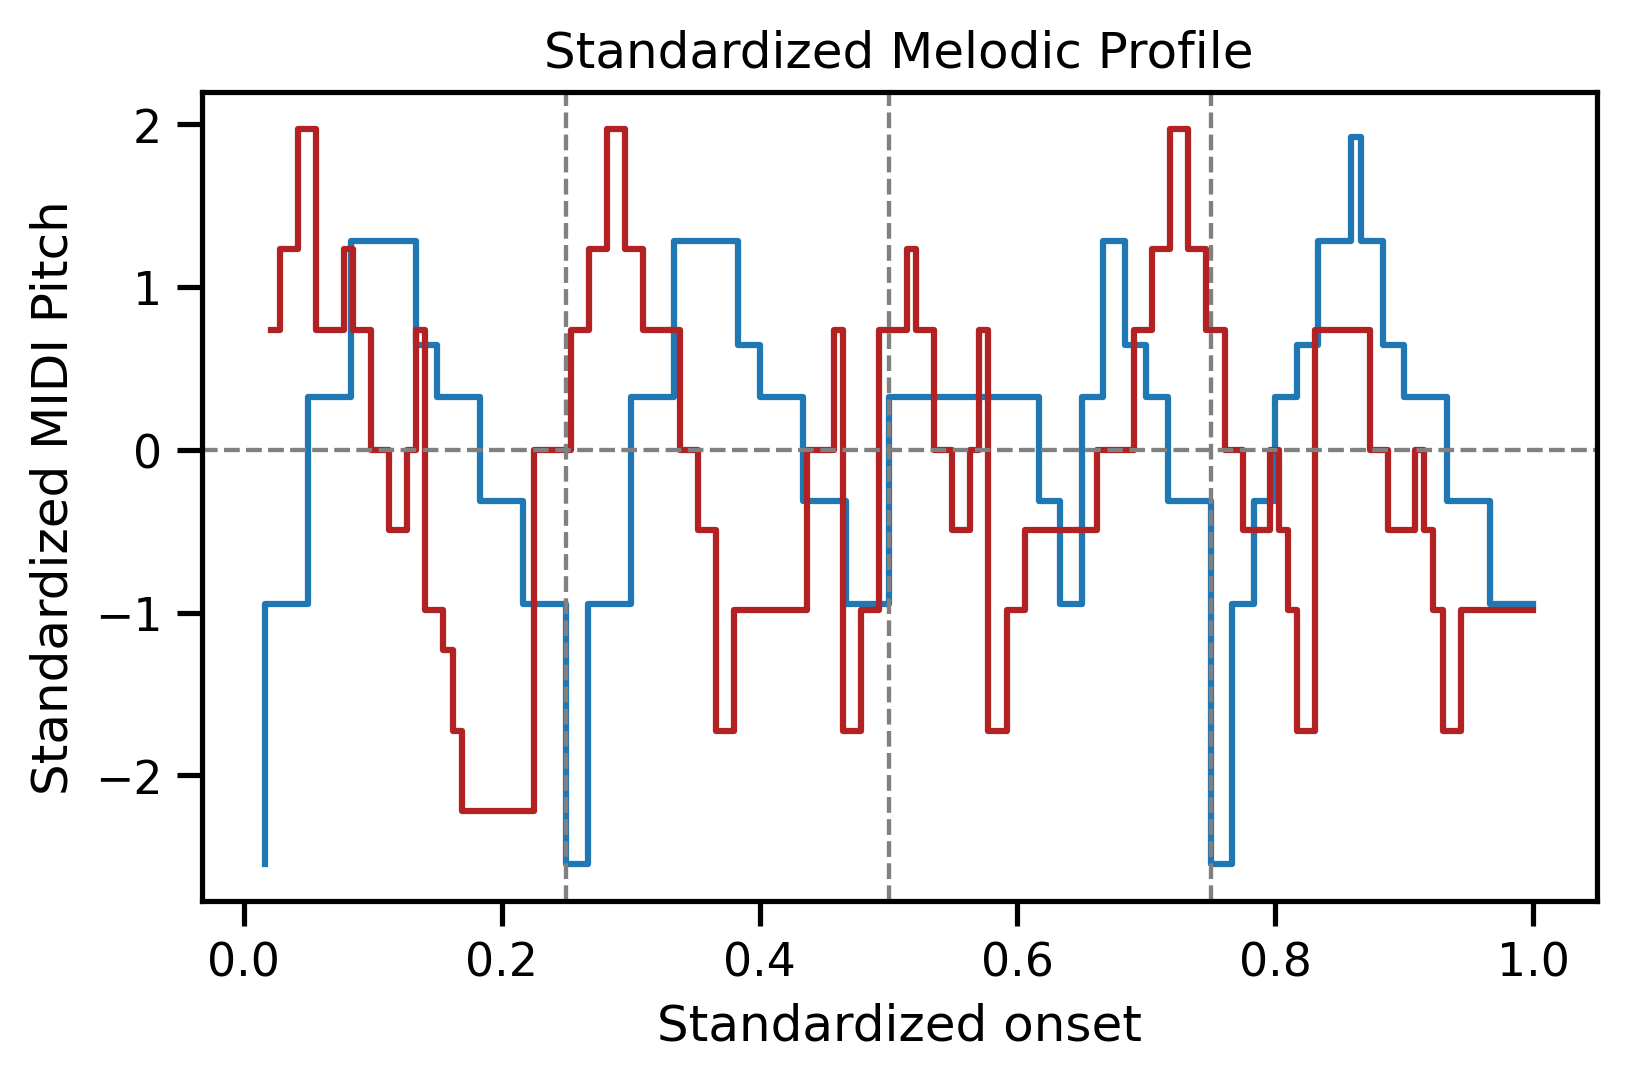

In [232]:
plot_standardized(german_song, mean=True)
plot_standardized(chinese_song, c="firebrick")

In [126]:
def plot_pitch_distribution(song_id):
    g = sns.distplot(big_df[big_df["song_id"] == song_id]["pitch"])
    
    return g    

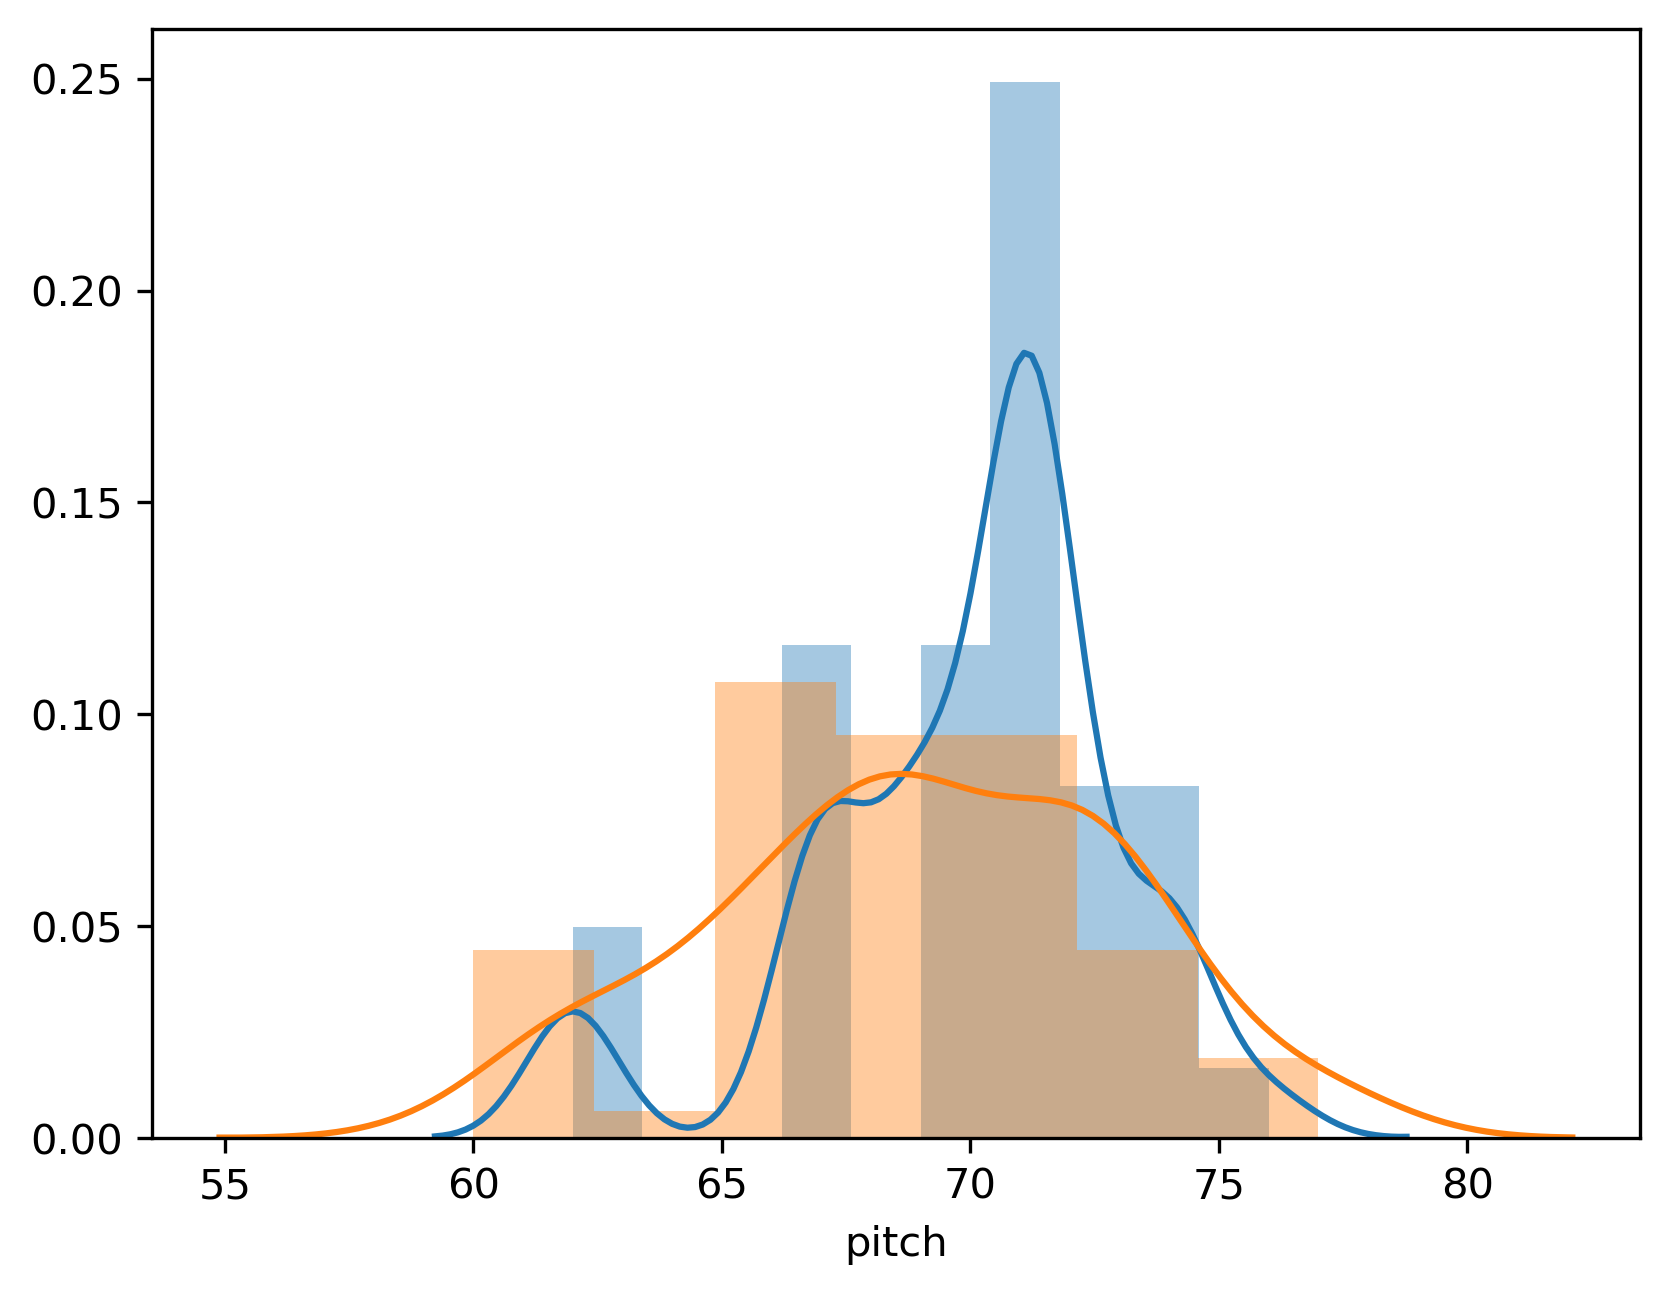

In [75]:
plot_pitch_distribution(70)
plot_pitch_distribution(6200)
plt.show()

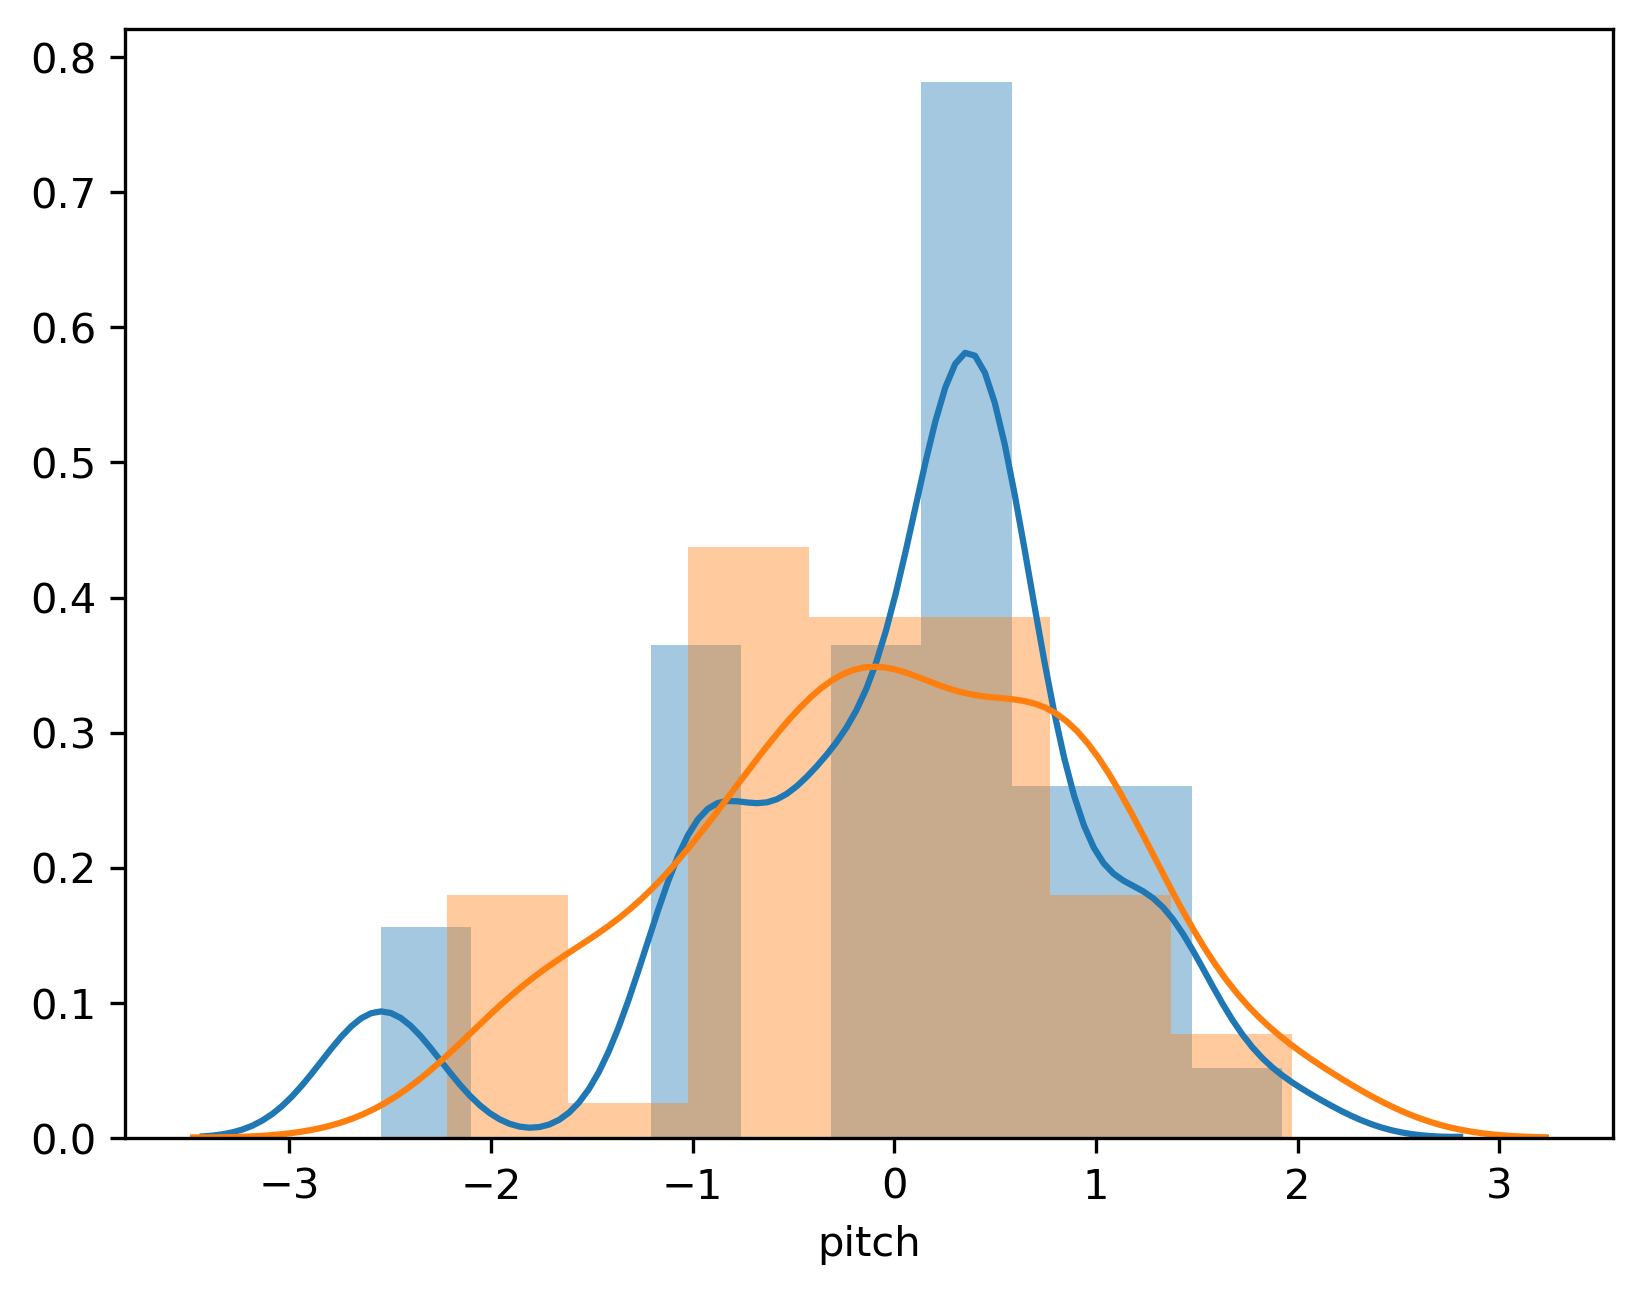

In [86]:
german = big_df[big_df["song_id"] == 70]["pitch"]
chinese = big_df[big_df["song_id"] == 6200]["pitch"]

german = german - german.mean()
chinese = chinese - chinese.mean()

german = german / german.std()
chinese = chinese / chinese.std()

sns.distplot(german)
sns.distplot(chinese);

In [101]:
# relative onset


In [30]:
# Pitch

# mean

# variance / standard dev

# Z transformation of pitch

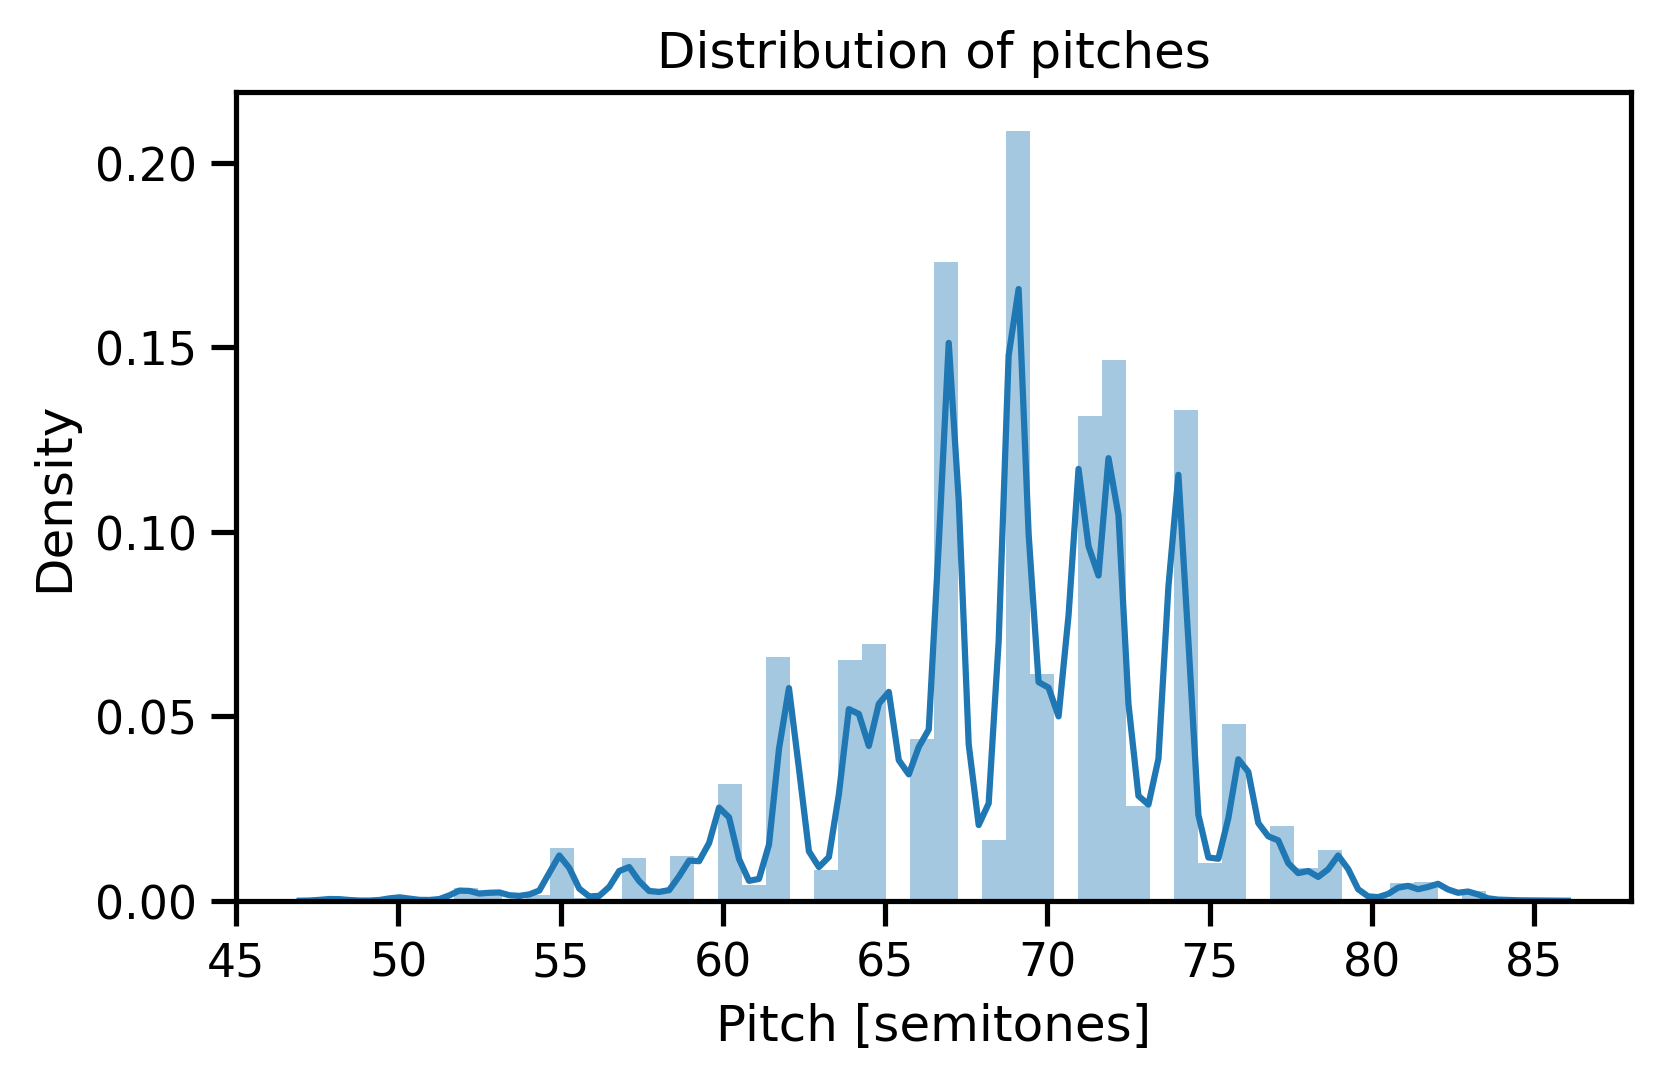

In [250]:
g = sns.distplot(big_df["pitch"])
plt.xlabel("Pitch [semitones]")
plt.ylabel("Density")
plt.title("Distribution of pitches")
plt.show()

In [55]:
big_df.groupby("song_id")

In [21]:
dfs = []

for i in range(len(songs)):
    df = pd.DataFrame( [(i, note.pitch.midi, note.quarterLength/4) for note in songs[i].flat.notes ], columns=["song_id", "pitch", "duration"])
    df["onset"] = df["duration"].cumsum()
    df["rel_onset"] = df["onset"] / df["onset"].max()
    df["Z_pitch"] = (df["pitch"] - df["pitch"].mean())/df["pitch"].std(ddof=0)
    
    dfs.append(df)

big_df = pd.concat(dfs).reset_index(drop=True)
big_df.to_csv("data/big_df.csv")
big_df.shape

(450596, 6)

In [22]:
big_df.head(10)

,song_id,pitch,duration,onset,rel_onset,Z_pitch
0,0,67,0.5,0.5,0.013158,-1.834390
1,0,70,0.5,1.0,0.026316,-0.748238
2,0,71,0.5,1.5,0.039474,-0.386187
3,0,72,0.5,2.0,0.052632,-0.024137
4,0,72,0.5,2.5,0.065789,-0.024137
5,0,74,1.0,3.5,0.092105,0.699965
6,0,74,1.0,4.5,0.118421,0.699965
7,0,74,1.0,5.5,0.144737,0.699965
8,0,74,0.5,6.0,0.157895,0.699965
9,0,74,0.5,6.5,0.171053,0.699965


In [23]:
big_df.tail(6)

,song_id,pitch,duration,onset,rel_onset,Z_pitch
450590,8513,72,0.0625,7.0625,0.926230,0.994447
450591,8513,71,0.0625,7.1250,0.934426,0.696113
450592,8513,69,0.0625,7.1875,0.942623,0.099445
450593,8513,73,0.0625,7.2500,0.950820,1.292781
450594,8513,71,0.2500,7.5000,0.983607,0.696113
450595,8513,69,0.1250,7.6250,1.000000,0.099445


In [24]:
big_df.sample(5)

,song_id,pitch,duration,onset,rel_onset,Z_pitch
439013,8305,74,0.250,10.500,0.666667,0.887141
272430,5422,78,0.125,7.875,0.575342,0.228576
383437,7243,69,0.125,0.375,0.016667,-0.171936
398001,7529,71,0.250,2.250,0.191489,1.187626
79611,1860,67,0.250,0.750,0.056604,-0.034597


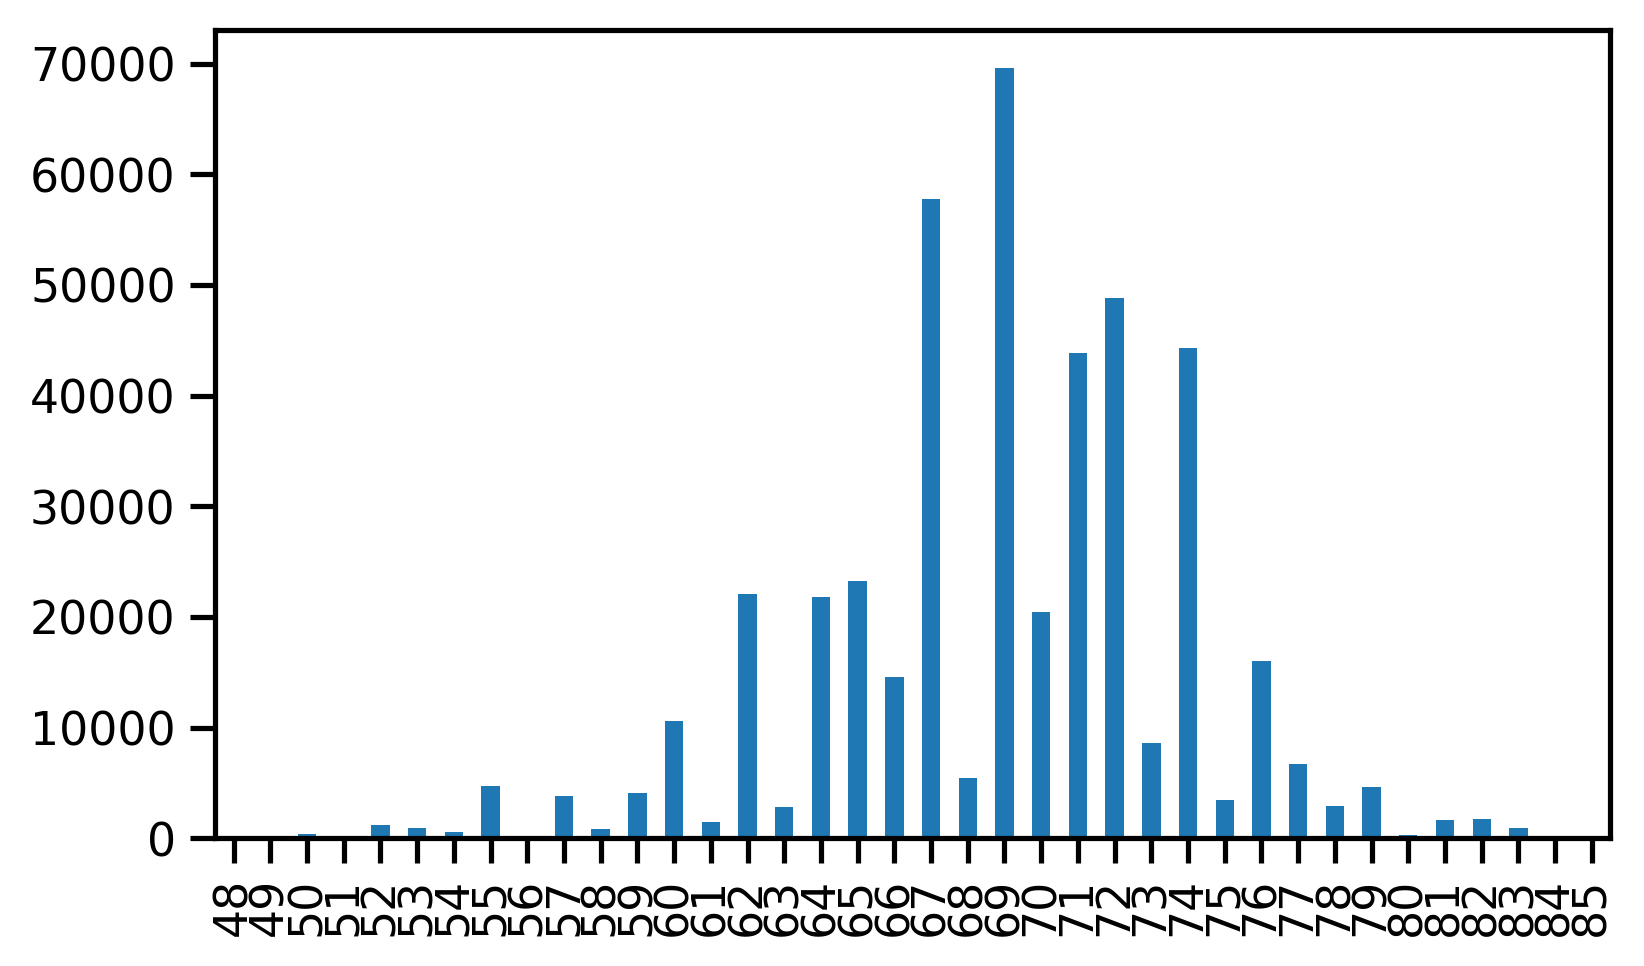

In [249]:
big_df["pitch"].value_counts().sort_index().plot(kind="bar");

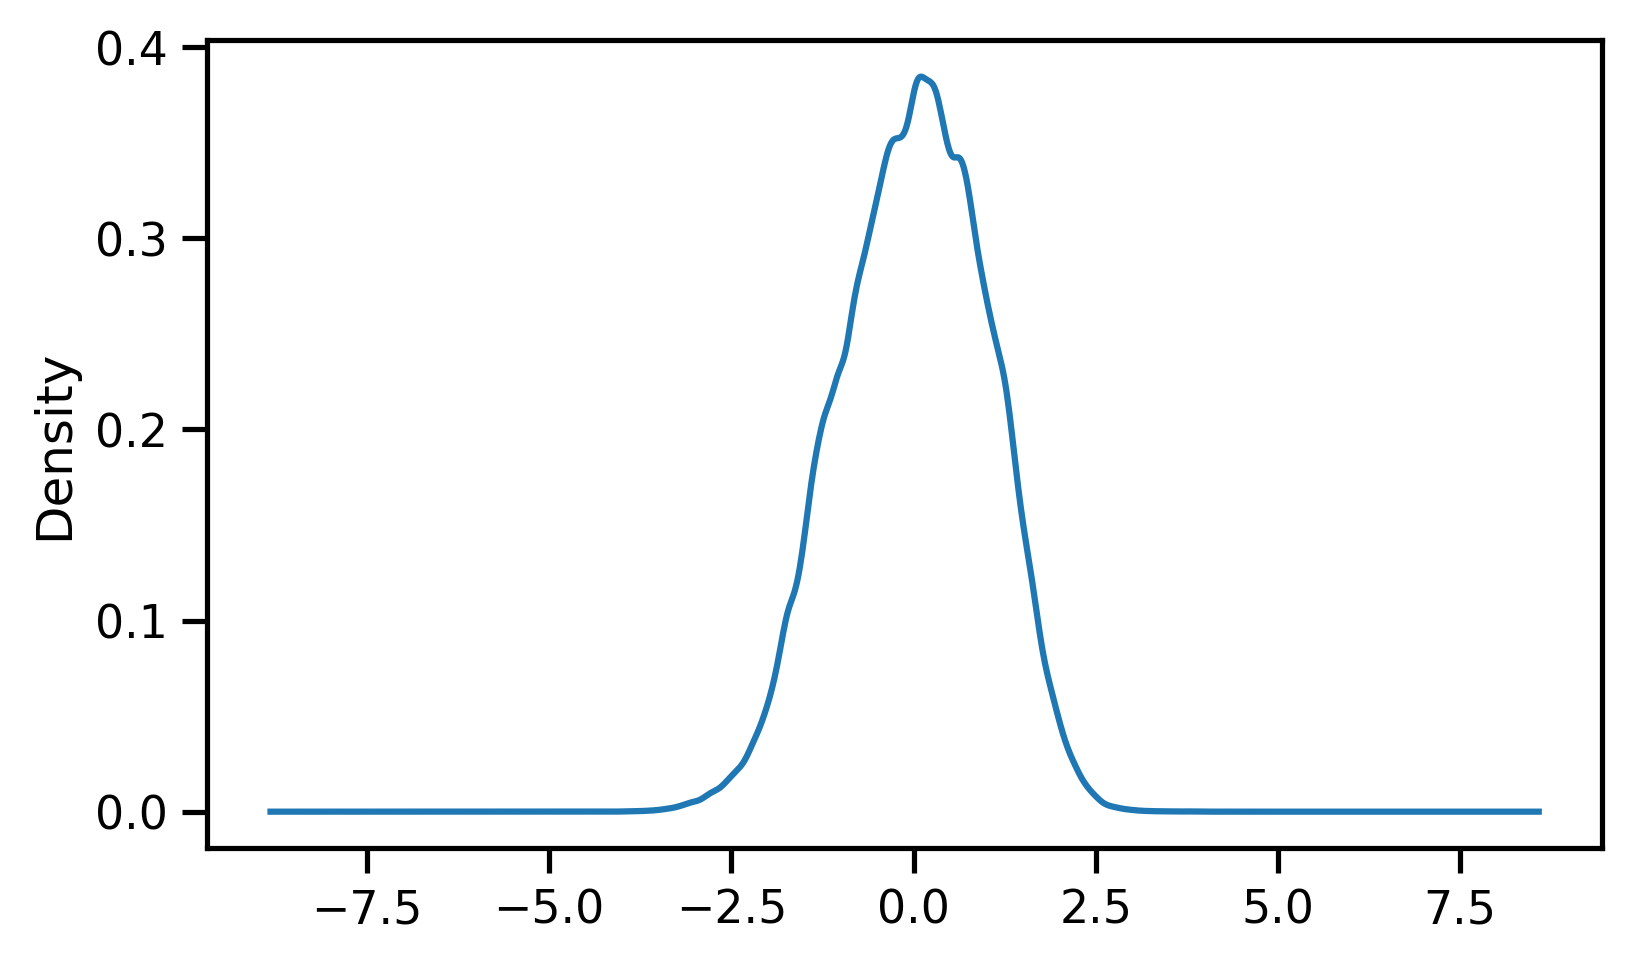

In [248]:
big_df["Z_pitch"].plot(kind="kde");

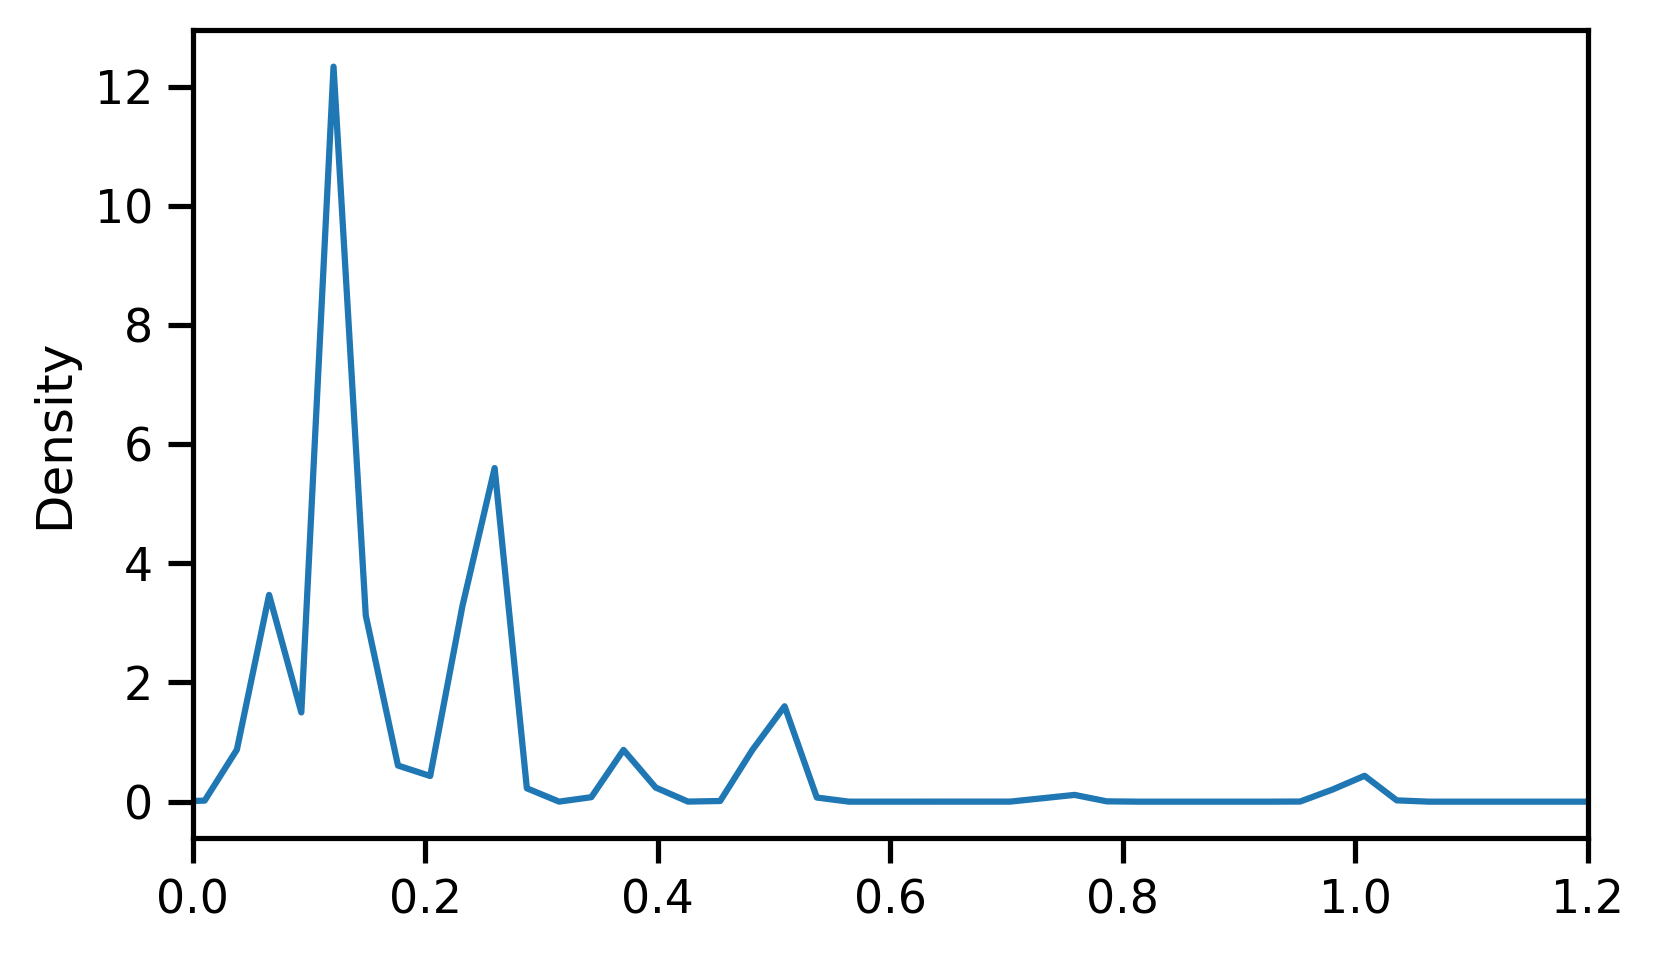

In [247]:
big_df["duration"].plot(kind="kde",xlim=(0,1.2));

## The melodic arc

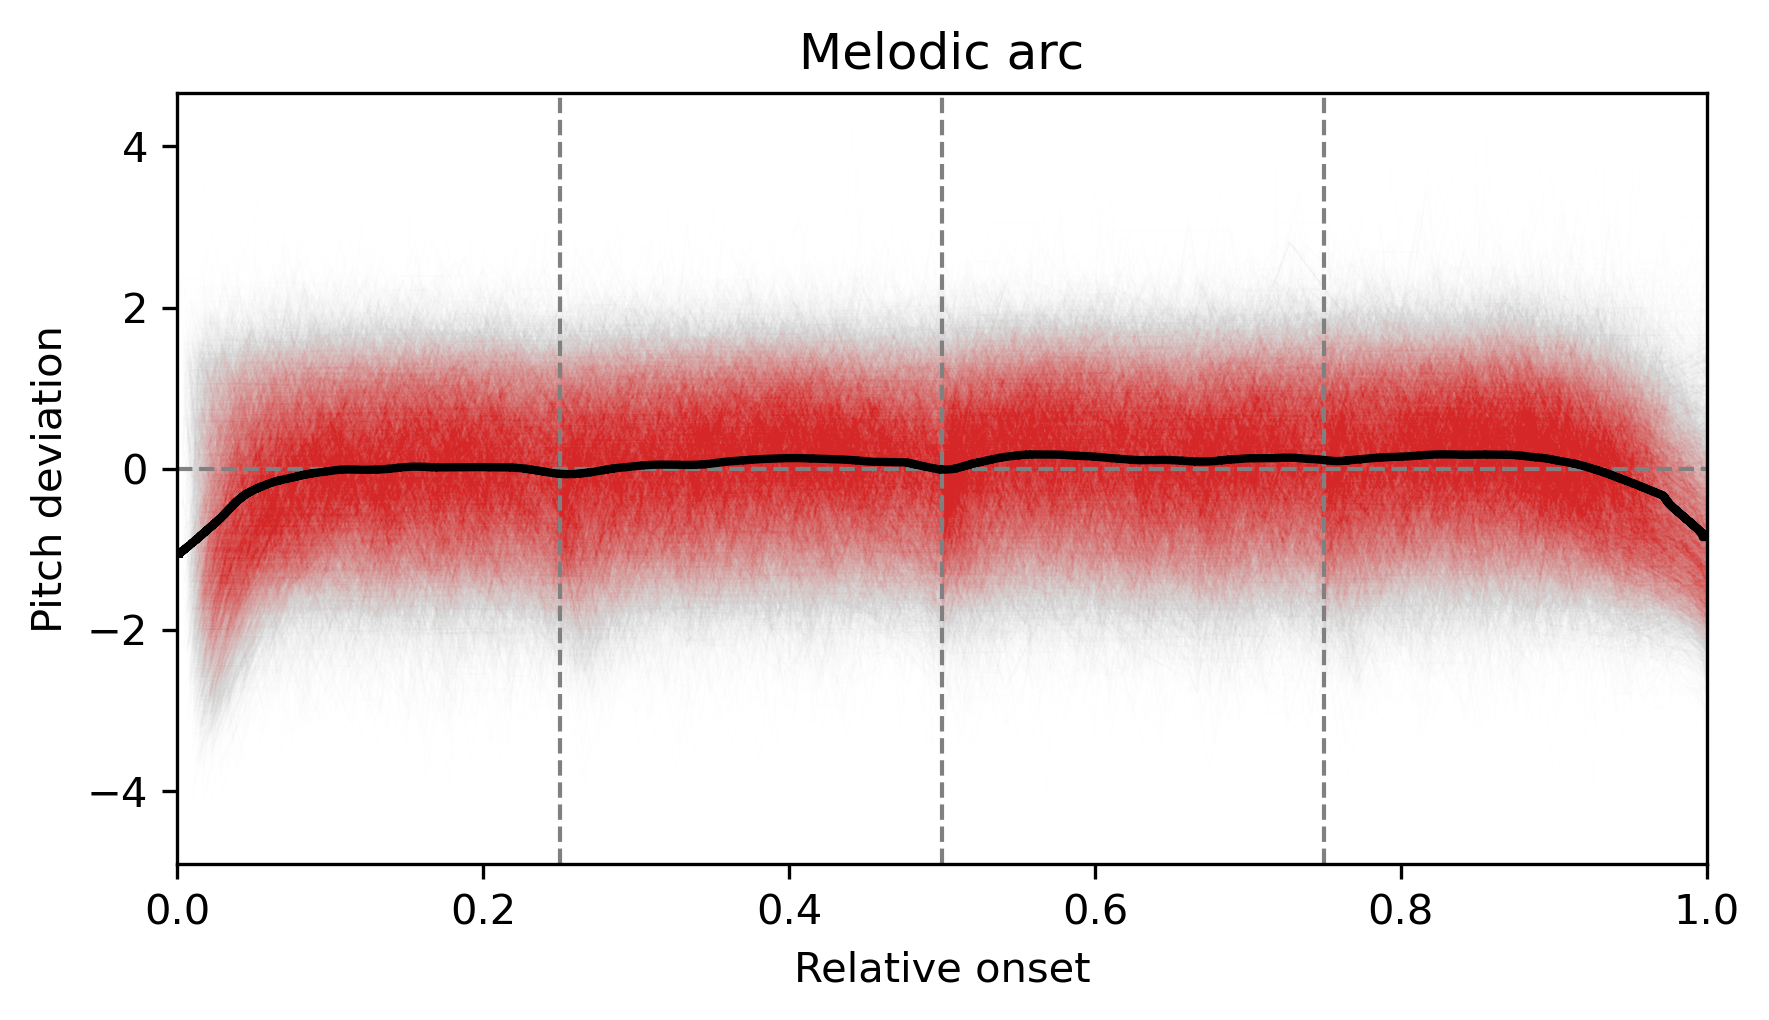

Wall time: 2min 49s


In [171]:
%%time

fig, ax = plt.subplots()
plt.xlim(0,1)

grouped = big_df.groupby("song_id")

for i, g in grouped:
    x = g["rel_onset"].values
    y = g["Z_pitch"].values
    ax.plot(x,y, lw=.5, c="tab:red", alpha=1/400)
        
ax.axvline(.25, lw=1, ls="--", c="gray")
ax.axvline(.5, lw=1, ls="--", c="gray")
ax.axvline(.75, lw=1, ls="--", c="gray")
ax.axhline(0, lw=1, ls="--", c="gray")

lowess = sm.nonparametric.lowess
big_x = big_df["rel_onset"].values
big_y = big_df["Z_pitch"].values
big_z = lowess(big_y, big_x, frac=5/100)
ax.step(big_z[:,0], big_z[:,1], c="black", lw=2)

plt.title("Melodic arc")
plt.xlabel("Relative onset")
plt.ylabel("Pitch deviation")

plt.tight_layout()
plt.savefig("img/melodic_arc.png")
plt.show()

## Intervals

In [160]:
intervals = []
for i, g in big_df.groupby("song_id"):
    ints = [ p2-p1 for p1, p2 in zip(g.pitch, g.pitch[1:])]
    intervals.append(ints)

In [161]:
big_df["mean_pitch"] = 0

for i, group in big_df.groupby("song_id"):
    grp_mean_pitch = int(group["pitch"].mean())
    big_df.loc[big_df["song_id"] == i, "mean_pitch"] = grp_mean_pitch

In [162]:
big_df["shifted_pitch"] = big_df["pitch"] - big_df["mean_pitch"]

In [163]:
big_df.tail()

,song_id,pitch,duration,onset,rel_onset,Z_pitch,mean_pitch,shifted_pitch
450591,8513,71,0.0625,7.1250,0.934426,0.696113,68,3
450592,8513,69,0.0625,7.1875,0.942623,0.099445,68,1
450593,8513,73,0.0625,7.2500,0.950820,1.292781,68,5
450594,8513,71,0.2500,7.5000,0.983607,0.696113,68,3
450595,8513,69,0.1250,7.6250,1.000000,0.099445,68,1


In [164]:
idx = np.arange(big_df["shifted_pitch"].min(), big_df["shifted_pitch"].max() + 1)
idx

array([-16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17])

In [165]:
transitions_df = pd.DataFrame(0, index=idx, columns=idx)
transitions_df

,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,...,8,9,10,11,12,13,14,15,16,17
-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
%%time

for i, group in big_df.groupby("song_id"):
    for bg in zip(group["shifted_pitch"], group["shifted_pitch"][1:]):
        transitions_df.loc[bg[0],bg[1]] +=1

Wall time: 1min 30s


In [196]:
print(f"There are {transitions_df.sum().sum()} intervals in total in the corpus.")

There are 442082 intervals in total in the corpus.


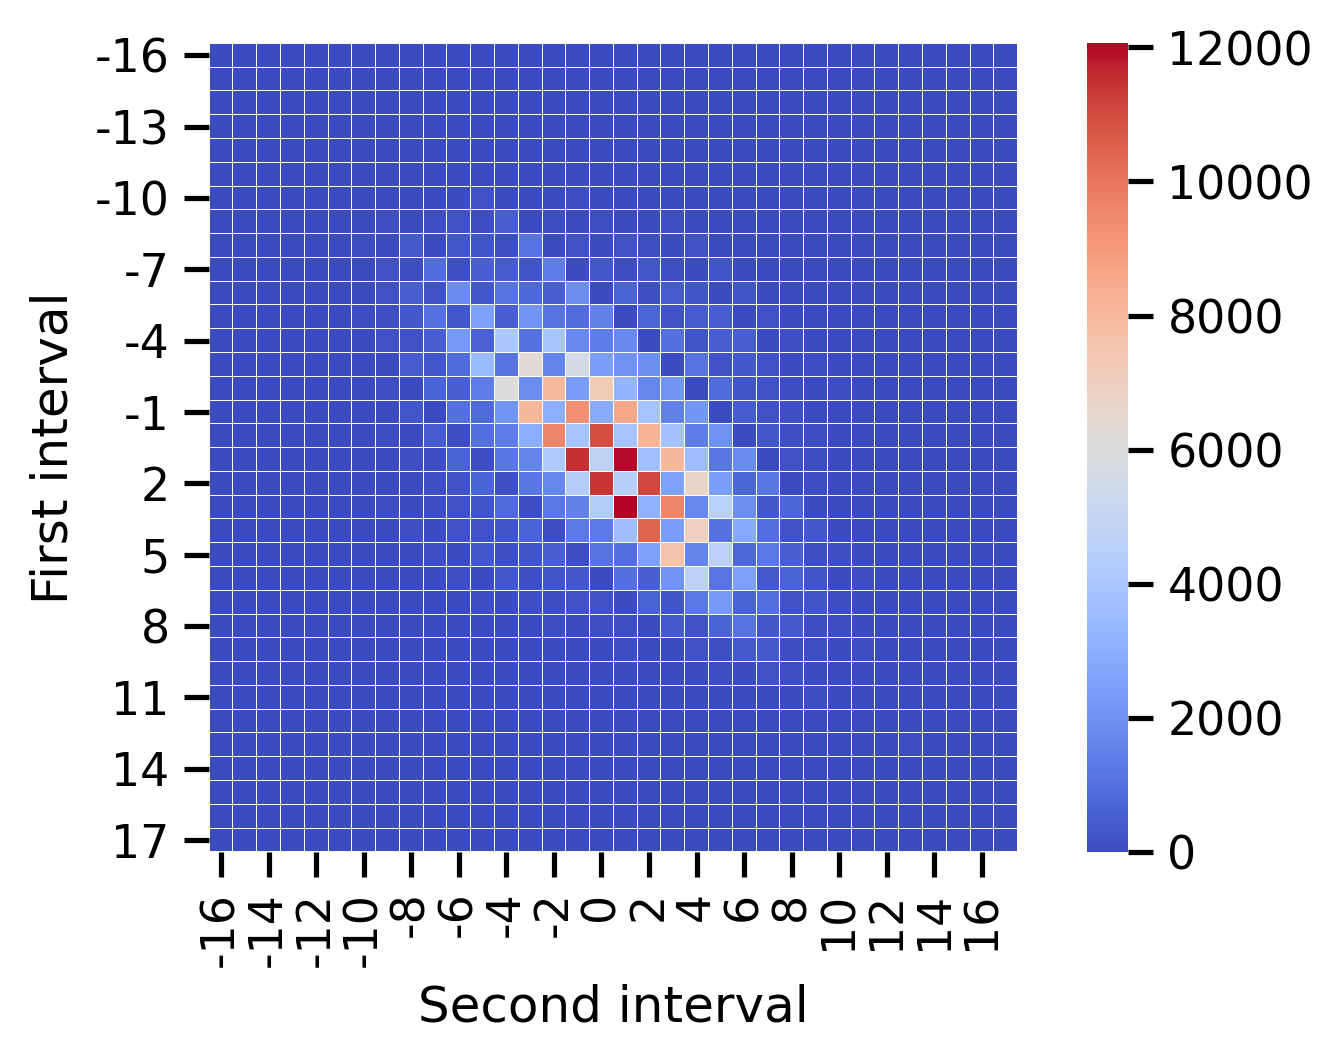

In [246]:
g = sns.heatmap(transitions_df, cmap="coolwarm", linewidths=.01, square=True)
plt.ylabel("First interval")
plt.xlabel("Second interval")
plt.show()

Narmour...